<a href="https://colab.research.google.com/github/DayenaJeong/FS_neruon/blob/main/FS_draw_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
def relu(x):
    return np.maximum(0, x)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def swish(x):
    return x * 1 / (1 + np.exp(-x))


def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))


def softplus(x, beta=1):
    return (1 / beta) * np.log1p(1 + np.exp(beta * x))


def mish(x, beta=1):
    return x * np.tanh(softplus(x, beta))

In [6]:
@tf.custom_gradient
def spike_function(v_scaled):
    z_ = tf.where(v_scaled > 0, tf.ones_like(v_scaled), tf.zeros_like(v_scaled))
    z_ = tf.cast(z_, dtype=tf.float32)

    def grad(dy):
        dE_dz = dy
        dz_dv_scaled = tf.maximum(1 - tf.abs(v_scaled), 0)
        dE_dv_scaled = dE_dz * dz_dv_scaled
        return [dE_dv_scaled]

    return tf.identity(z_, name="SpikeFunction"), grad

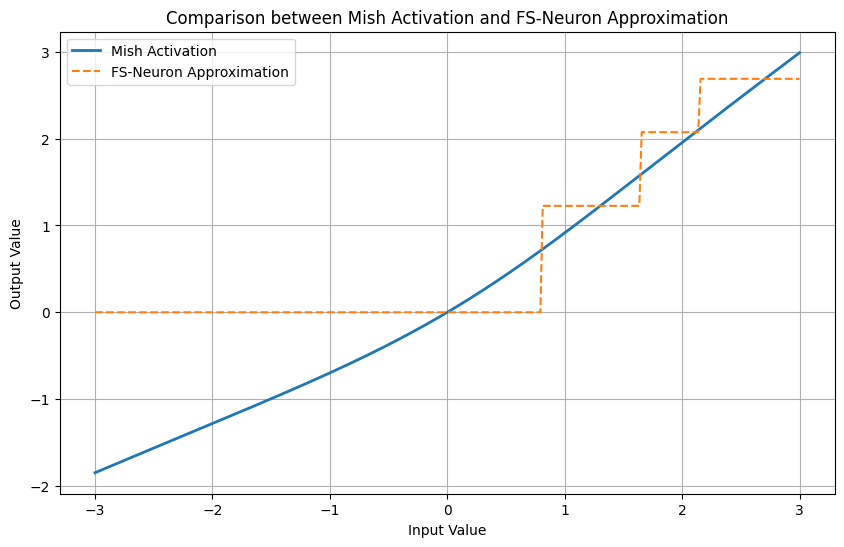

In [9]:
@tf.function
def fs_coding(x, h, d, T, K):
    v = tf.identity(x)  # 막 전위
    out = tf.zeros_like(x)  # 출력
    for t in tf.range(K):
        v_scaled = (v - T[t]) / (tf.abs(v) + 1)  # 정규화된 'v' 계산
        z = spike_function(v_scaled)  # 뉴런 발화 여부 결정
        out += z * d[t]  # 출력 계산
        v -= z * h[t]  # 발화시 'h[t]' 만큼 감소
    return out

# Variables
x_values = np.linspace(-3, 3, 300, dtype=np.float32)
h = tf.constant([2.6590915, 2.9027085, 1.9391851, -0.9345757], dtype=tf.float32)
d = tf.constant([2.6871412, 3.0229318, 2.0728903, 1.2249625], dtype=tf.float32)
T = tf.constant([2.1377327, 2.307492, 1.6414999, 0.79307884], dtype=tf.float32)
K = 4

# 함수 적용
mish_values = mish(x_values)
fs_values = fs_coding(x_values, h, d, T, K)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, mish_values, label='Mish Activation', linewidth=2)
plt.plot(x_values, fs_values, label='FS-Neuron Approximation', linestyle='--')
plt.title('Comparison between Mish Activation and FS-Neuron Approximation')
plt.xlabel('Input Value')
plt.ylabel('Output Value')
plt.legend()
plt.grid(True)
plt.show()

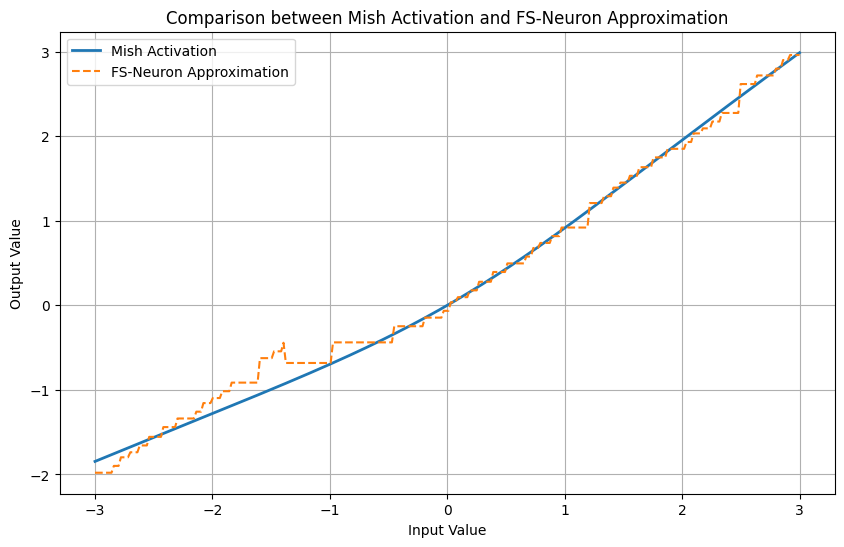

In [10]:
# Variables
x_values = np.linspace(-3, 3, 300, dtype=np.float32)
h = tf.constant([
    2.8037484, 4.6457806, 2.8274832, 1.3705587, 4.770011, -18.30075,
    -30.40822, -7.5395164, 0.6993742, 1.7388186, 54.169178, 1.5084945,
    -1.3123262, 0.22726144, 1.0505008, -0.41180193
], dtype=tf.float32)

d = tf.constant([
    1.8344473, 4.692214, 2.8646061, 1.355311, 2.8081872, 0.64544934,
    0.6737572, -5.7997203, 0.6415091, 0.9606017, 1.9154409, 0.7186863,
    0.19096331, 0.18231861, 0.00738892, 0.10168018
], dtype=tf.float32)

T = tf.constant([
    -1.3756111, 1.1794566, -0.308627, -1.5974149, -4.922306, 1., 1.,
    -13.4982, 0.339024, 0.05359778, 0.99848413, -1.0213091, -2.0038435,
    -0.2762634, 1.0000364, -0.43340132
], dtype=tf.float32)
K = 16

# 함수 적용
mish_values = mish(x_values)
fs_values = fs_coding(x_values, h, d, T, K)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, mish_values, label='Mish Activation', linewidth=2)
plt.plot(x_values, fs_values, label='FS-Neuron Approximation', linestyle='--')
plt.title('Comparison between Mish Activation and FS-Neuron Approximation')
plt.xlabel('Input Value')
plt.ylabel('Output Value')
plt.legend()
plt.grid(True)
plt.show()

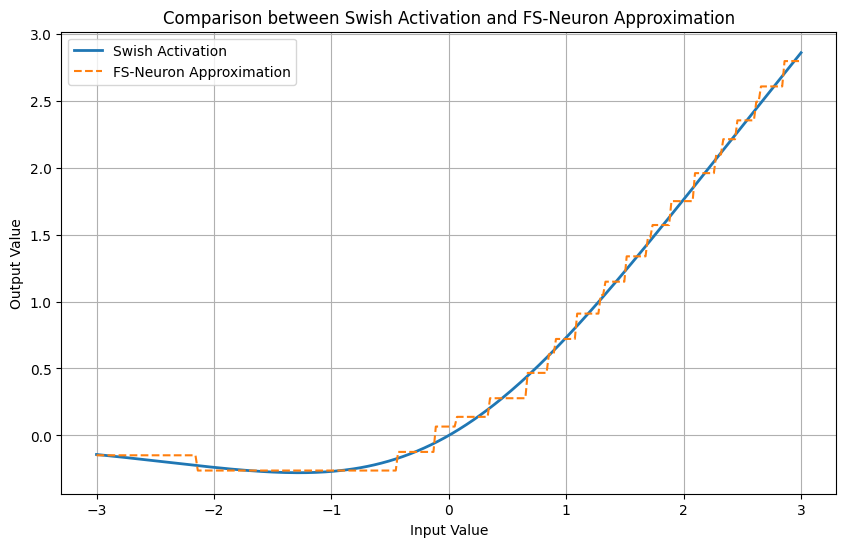

In [13]:
# Variables
x_values = np.linspace(-3, 3, 300, dtype=np.float32)
h = tf.constant([0.7844085, 1.7550646, 1.4212719, 1.9244663,
           1.4400164, 1.9249276, 1.6100428, 1.29061, 0.83985287,
           3.0827985, 0.43503317, 0.5155389, 0.3269445, 7.618048,
           -14.419675, 0], dtype=tf.float32)

d = tf.constant([0.40088242, 1.8856316, 1.4915457, 1.947229, 1.4717816, 1.9147849,
           1.6389303, 1.2934641, 0.8703124, 0.68460804, 0.44262582, 0.32832766,
           0.13907616, -0.26217145, 0.23736191, -0.14830568], dtype=tf.float32)

T = tf.constant([0.05946945, 1.6541206, 1.3066754, 1.3267198, 1.1000695, 1.2308974,
           1.1188028, 0.9472501, 0.5447531, 1.0236325, 0.11921431, -0.12855051,
           -0.44731247, -2.1383545, 1., -4.109145], dtype=tf.float32)
K = 16

# 함수 적용
swish_values = swish(x_values)
fs_values = fs_coding(x_values, h, d, T, K)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, swish_values, label='Swish Activation', linewidth=2)
plt.plot(x_values, fs_values, label='FS-Neuron Approximation', linestyle='--')
plt.title('Comparison between Swish Activation and FS-Neuron Approximation')
plt.xlabel('Input Value')
plt.ylabel('Output Value')
plt.legend()
plt.grid(True)
plt.show()